In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformer_lens.utils import test_prompt
from transformer_lens import HookedTransformer

In [2]:
# load results
df = pd.read_csv('ioi_logit_dump.csv')

In [4]:
df.columns

Index(['template', 'PLACE', 'OBJECT', 'S', 'IO', 'text', 'prompt_toks',
       'logit_diff'],
      dtype='object')

In [5]:
# Let's plot some of these extremes against the rest
def plot_against_alt(df, col, val, label_prefix=""):
    _, bins, _ = plt.hist(df['logit_diff'][df[col] != val], bins=100,  density=True, alpha=0.5, label=label_prefix+"All Others")
    plt.hist(df['logit_diff'][df[col] == val], bins=bins, density=True, alpha=0.5, label=f"{label_prefix}{col}:{val}")
    plt.legend()
    plt.show()

In [10]:
subset_res_list = []
# check all template subsets
for col in ["template", "PLACE", "OBJECT", "S", "IO"]:
    print("Starting ", col)
    unique_vals = df[col].unique().tolist()
    for val in tqdm(unique_vals):
        subset_dict = {}
        subset_dict["col"] = col
        subset_dict["val"] = val

        subset_dict["mean"] = df['logit_diff'][df[col] == val].mean()
        subset_dict["std"] = df['logit_diff'][df[col] == val].std()
        subset_dict["alt_mean"] = df['logit_diff'][df[col] != val].mean()
        subset_dict["alt_std"] = df['logit_diff'][df[col] != val].std()

        subset_res_list.append(subset_dict)

Starting  template


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]


Starting  PLACE


100%|██████████| 8/8 [00:01<00:00,  5.27it/s]


Starting  OBJECT


100%|██████████| 8/8 [00:01<00:00,  5.57it/s]


Starting  S


100%|██████████| 99/99 [00:17<00:00,  5.72it/s]


Starting  IO


100%|██████████| 99/99 [00:20<00:00,  4.94it/s]


In [11]:
first_order_df = pd.DataFrame(subset_res_list)

(array([1.09544108e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.28632324e-05, 1.09544108e-05,
        3.28632324e-05, 5.47720541e-05, 1.42407341e-04, 1.42407341e-04,
        1.97179395e-04, 3.83404379e-04, 2.95769092e-04, 3.61495557e-04,
        4.81994076e-04, 7.12036703e-04, 9.42079330e-04, 1.46789105e-03,
        2.19088216e-03, 3.76831732e-03, 5.00616574e-03, 7.64617875e-03,
        1.08339123e-02, 1.49965884e-02, 2.07805173e-02, 2.55128228e-02,
        3.49664793e-02, 4.69506048e-02, 5.82993744e-02, 7.28577863e-02,
        8.86430923e-02, 1.07835220e-01, 1.24453061e-01, 1.46887695e-01,
        1.68435021e-01, 1.88514456e-01, 2.07816128e-01, 2.24346333e-01,
        2.38400843e-01, 2.53561747e-01, 2.60649251e-01, 2.70606810e-01,
        2.71209303e-01, 2.73936951e-01, 2.66597496e-01, 2.64636656e-01,
        2.56968569e-01, 2.46079885e-01, 2.37316356e-01, 2.22987987e-01,
        2.08451483e-01, 1.95569096e-01, 1.81317408e-01, 1.666823

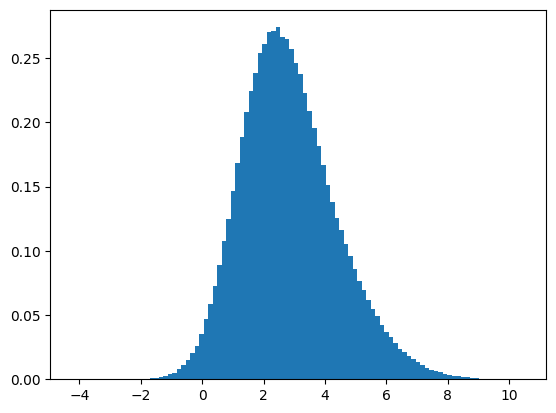

In [21]:
# plot full histogram
plt.hist(df['logit_diff'], bins=100,  density=True)

In [12]:
# global mean and std
global_mean = df['logit_diff'].mean()
global_std = df['logit_diff'].std()

print("Global mean:", global_mean)
print("Global std:", global_std)

Global mean: 2.8410530367421134
Global std: 1.550526348529977


In [13]:
first_order_df["global_mean_diff"] = (first_order_df["mean"] - global_mean).abs()
first_order_df["global_std_diff"] = (first_order_df["std"] - global_std).abs()
first_order_df["relative_mean_diff"] = (first_order_df["mean"] - first_order_df["alt_mean"]).abs()
first_order_df["relative_std_diff"] = (first_order_df["std"] - first_order_df["alt_std"]).abs()

In [14]:
first_order_df.sort_values("global_mean_diff", ascending=False).head(10)

,col,val,mean,std,alt_mean,alt_std,global_mean_diff,global_std_diff,relative_mean_diff,relative_std_diff
26,S,Bradley,5.686855,1.362495,2.812014,1.525202,2.845802,0.188031,2.874841,0.162707
66,S,Jeffrey,5.481752,1.333920,2.814107,1.529257,2.640699,0.216606,2.667645,0.195337
104,S,Alexander,4.819184,1.211386,2.820868,1.540570,1.978131,0.339140,1.998316,0.329184
208,IO,Angela,4.655091,1.733737,2.822542,1.537555,1.814038,0.183211,1.832549,0.196182
20,S,Lindsey,1.053393,1.312990,2.859294,1.542120,1.787660,0.237536,1.805901,0.229129
108,S,Amanda,1.166641,0.986863,2.858139,1.545907,1.674412,0.563663,1.691498,0.559043
212,IO,Bradley,1.245273,1.072404,2.857337,1.546183,1.595780,0.478122,1.612063,0.473778
171,IO,Amy,4.435444,1.738946,2.824784,1.540003,1.594391,0.188420,1.610660,0.198944
80,S,Lisa,1.292098,0.978007,2.856859,1.547312,1.548955,0.572519,1.564761,0.569304
114,S,Courtney,1.355508,1.045270,2.856212,1.547504,1.485545,0.505257,1.500704,0.502234


In [15]:
first_order_df.sort_values("relative_mean_diff", ascending=False).head(10)

,col,val,mean,std,alt_mean,alt_std,global_mean_diff,global_std_diff,relative_mean_diff,relative_std_diff
26,S,Bradley,5.686855,1.362495,2.812014,1.525202,2.845802,0.188031,2.874841,0.162707
66,S,Jeffrey,5.481752,1.333920,2.814107,1.529257,2.640699,0.216606,2.667645,0.195337
104,S,Alexander,4.819184,1.211386,2.820868,1.540570,1.978131,0.339140,1.998316,0.329184
208,IO,Angela,4.655091,1.733737,2.822542,1.537555,1.814038,0.183211,1.832549,0.196182
20,S,Lindsey,1.053393,1.312990,2.859294,1.542120,1.787660,0.237536,1.805901,0.229129
108,S,Amanda,1.166641,0.986863,2.858139,1.545907,1.674412,0.563663,1.691498,0.559043
212,IO,Bradley,1.245273,1.072404,2.857337,1.546183,1.595780,0.478122,1.612063,0.473778
171,IO,Amy,4.435444,1.738946,2.824784,1.540003,1.594391,0.188420,1.610660,0.198944
80,S,Lisa,1.292098,0.978007,2.856859,1.547312,1.548955,0.572519,1.564761,0.569304
114,S,Courtney,1.355508,1.045270,2.856212,1.547504,1.485545,0.505257,1.500704,0.502234


In [17]:
first_order_df.sort_values("mean", ascending=True).head(10)

,col,val,mean,std,alt_mean,alt_std,global_mean_diff,global_std_diff,relative_mean_diff,relative_std_diff
20,S,Lindsey,1.053393,1.312990,2.859294,1.542120,1.787660,0.237536,1.805901,0.229129
108,S,Amanda,1.166641,0.986863,2.858139,1.545907,1.674412,0.563663,1.691498,0.559043
212,IO,Bradley,1.245273,1.072404,2.857337,1.546183,1.595780,0.478122,1.612063,0.473778
80,S,Lisa,1.292098,0.978007,2.856859,1.547312,1.548955,0.572519,1.564761,0.569304
114,S,Courtney,1.355508,1.045270,2.856212,1.547504,1.485545,0.505257,1.500704,0.502234
46,S,David,1.369144,0.951347,2.856073,1.548256,1.471909,0.599179,1.486929,0.596909
137,IO,Alicia,1.379143,1.523543,2.855970,1.543681,1.461910,0.026984,1.476828,0.020138
34,S,Mary,1.385800,1.075051,2.855903,1.547592,1.455253,0.475476,1.470103,0.472542
90,S,Erin,1.394115,0.978595,2.855818,1.548326,1.446938,0.571931,1.461703,0.569730
201,IO,Mark,1.421539,1.108430,2.855538,1.547694,1.419514,0.442097,1.433999,0.439265


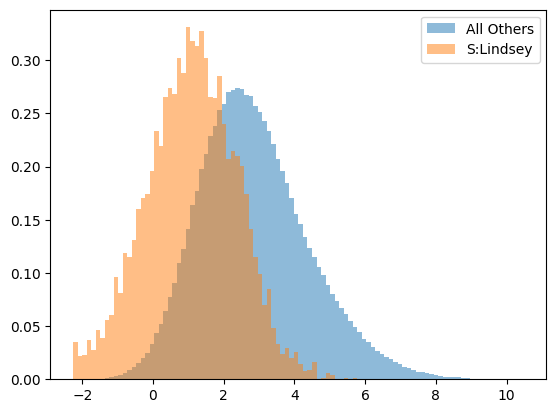

In [19]:
plot_against_alt(df, 'S', 'Lindsey', label_prefix="")

In [30]:
lindsey_s_df = df[df["S"] == "Lindsey"]

In [31]:
lindsey_s_res_list = []
# check all template subsets
for col in ["template", "PLACE", "OBJECT", "IO"]:
    unique_vals = lindsey_s_df[col].unique().tolist()
    for val in tqdm(unique_vals):
        subset_dict = {}
        subset_dict["col"] = col
        subset_dict["val"] = val

        subset_dict["mean"] = lindsey_s_df['logit_diff'][lindsey_s_df[col] == val].mean()
        subset_dict["std"] = lindsey_s_df['logit_diff'][lindsey_s_df[col] == val].std()
        subset_dict["alt_mean"] = lindsey_s_df['logit_diff'][lindsey_s_df[col] != val].mean()
        subset_dict["alt_std"] = lindsey_s_df['logit_diff'][lindsey_s_df[col] != val].std()

        lindsey_s_res_list.append(subset_dict)

100%|██████████| 98/98 [00:00<00:00, 407.70it/s]


In [32]:
lindsey_s_res_df = pd.DataFrame(lindsey_s_res_list)

In [33]:
lindsey_s_res_df.sort_values("mean", ascending=True).head(10)

,col,val,mean,std,alt_mean,alt_std
76,IO,Sara,-2.182376,0.696683,1.086752,1.275822
105,IO,Lindsay,-2.113549,0.343231,1.086042,1.279079
45,IO,Michelle,-1.142737,0.680767,1.076034,1.298758
98,IO,Kristen,-1.031666,0.626594,1.074889,1.300940
63,IO,Elizabeth,-0.899106,0.613597,1.073522,1.303144
92,IO,Sarah,-0.777892,0.429188,1.072272,1.305724
74,IO,Alicia,-0.760025,0.831424,1.072088,1.304012
35,IO,Jesse,-0.610917,0.481614,1.070551,1.307865
75,IO,Jennifer,-0.585196,0.612797,1.070286,1.307646
36,IO,Samantha,-0.469906,0.684665,1.069097,1.308736


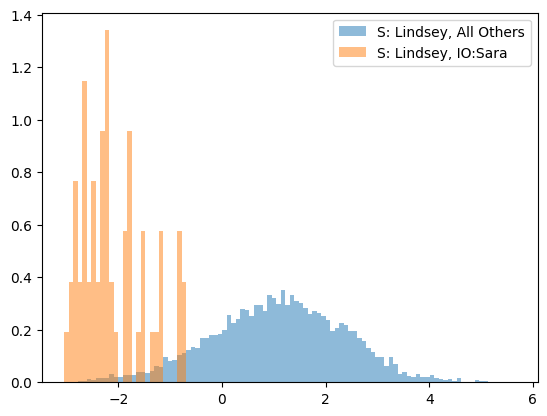

In [36]:
plot_against_alt(lindsey_s_df, "IO", "Sara", label_prefix="S: Lindsey, ")

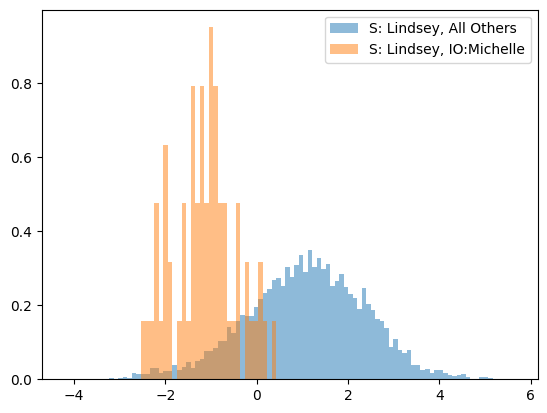

In [37]:
plot_against_alt(lindsey_s_df, "IO", "Michelle", label_prefix="S: Lindsey, ")

In [51]:
model = HookedTransformer.from_pretrained("gpt2")
tokenizer = model.tokenizer

Loaded pretrained model gpt2 into HookedTransformer


In [66]:
lindmich_df = lindsey_s_df[lindsey_s_df["IO"] == "Michelle"]
toks = lindmich_df.iloc[0]['prompt_toks'][1:-1].split(', ')
toks = [int(t) for t in toks]
prompt = tokenizer.decode(toks)
prompt

'Afterwards, Lindsey and Michelle went to the hospital. Lindsey gave a drink to'

In [67]:
test_prompt(prompt, "Michelle", model)

Tokenized prompt: ['<|endoftext|>', 'After', 'wards', ',', ' Lindsey', ' and', ' Michelle', ' went', ' to', ' the', ' hospital', '.', ' Lindsey', ' gave', ' a', ' drink', ' to']
Tokenized answer: [' Michelle']


Performance on answer token:
Rank: 3        Logit: 15.28 Prob:  8.35% Token: | Michelle|

Top 0th token. Logit: 16.38 Prob: 25.07% Token: | her|
Top 1th token. Logit: 16.19 Prob: 20.76% Token: | Lindsey|
Top 2th token. Logit: 15.36 Prob:  9.02% Token: | the|
Top 3th token. Logit: 15.28 Prob:  8.35% Token: | Michelle|
Top 4th token. Logit: 14.61 Prob:  4.25% Token: | them|
Top 5th token. Logit: 13.79 Prob:  1.88% Token: | everyone|
Top 6th token. Logit: 13.65 Prob:  1.63% Token: | a|
Top 7th token. Logit: 13.36 Prob:  1.23% Token: | me|
Top 8th token. Logit: 13.31 Prob:  1.16% Token: | both|
Top 9th token. Logit: 13.06 Prob:  0.90% Token: | their|


Ranks of the answer tokens: [(' Michelle', 3)]